In [2]:
!pip install wordcloud

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud

In [64]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [65]:
df['Text'] = df['Text'].str.lower()
df['Summary'] = df['Summary'].str.lower()
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...


In [66]:
print(df.shape)
print(df.isnull().values.any())
df.dropna(axis = 0 , inplace = True)
print(df.shape)

(568454, 10)
True
(568411, 10)


In [67]:
df.drop_duplicates(subset=['Score','Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(393652, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,good quality dog food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,cough medicine,if you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,great taffy,great taffy at a great price. there was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,nice taffy,i got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,great! just as good as the expensive brands!,this saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"wonderful, tasty taffy",this taffy is so good. it is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,yay barley,right now i'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,healthy dog food,this is a very healthy dog food. good for thei...


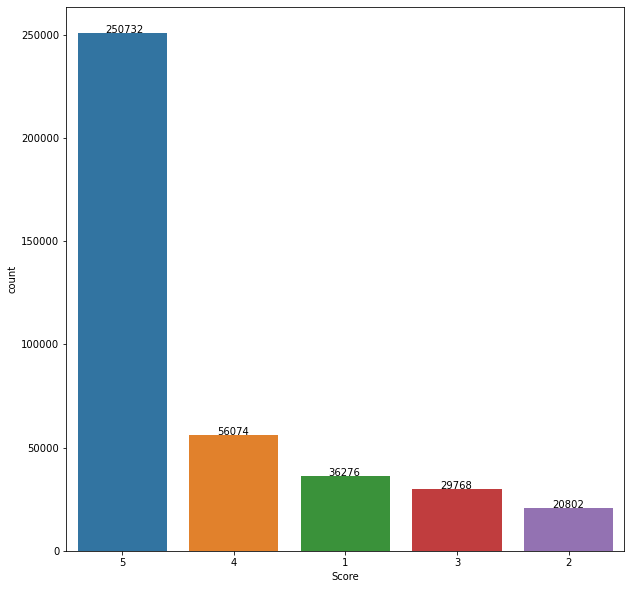

In [68]:
plt.figure(figsize=(10,10))

ax =sns.countplot(x=df["Score"],  data=df, order = df["Score"].value_counts().index )
for p, label in zip(ax.patches, df["Score"].value_counts()):
    #print(p)
    #print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [69]:
df.groupby('ProductId').count()

,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
ProductId,,,,,,,,,
0006641040,37,37,37,37,37,37,37,37,37
141278509X,1,1,1,1,1,1,1,1,1
2734888454,2,2,2,2,2,2,2,2,2
2841233731,1,1,1,1,1,1,1,1,1
7800648702,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
B009SF0TN6,1,1,1,1,1,1,1,1,1
B009SR4OQ2,1,1,1,1,1,1,1,1,1
B009UOFU20,1,1,1,1,1,1,1,1,1


In [70]:
df_products = df.groupby('ProductId').filter(lambda x: len(x) >= 400)
df_product_groups = df_products.groupby('ProductId')

In [71]:
print(len(df_products))
print(len(df_product_groups))

12034
23


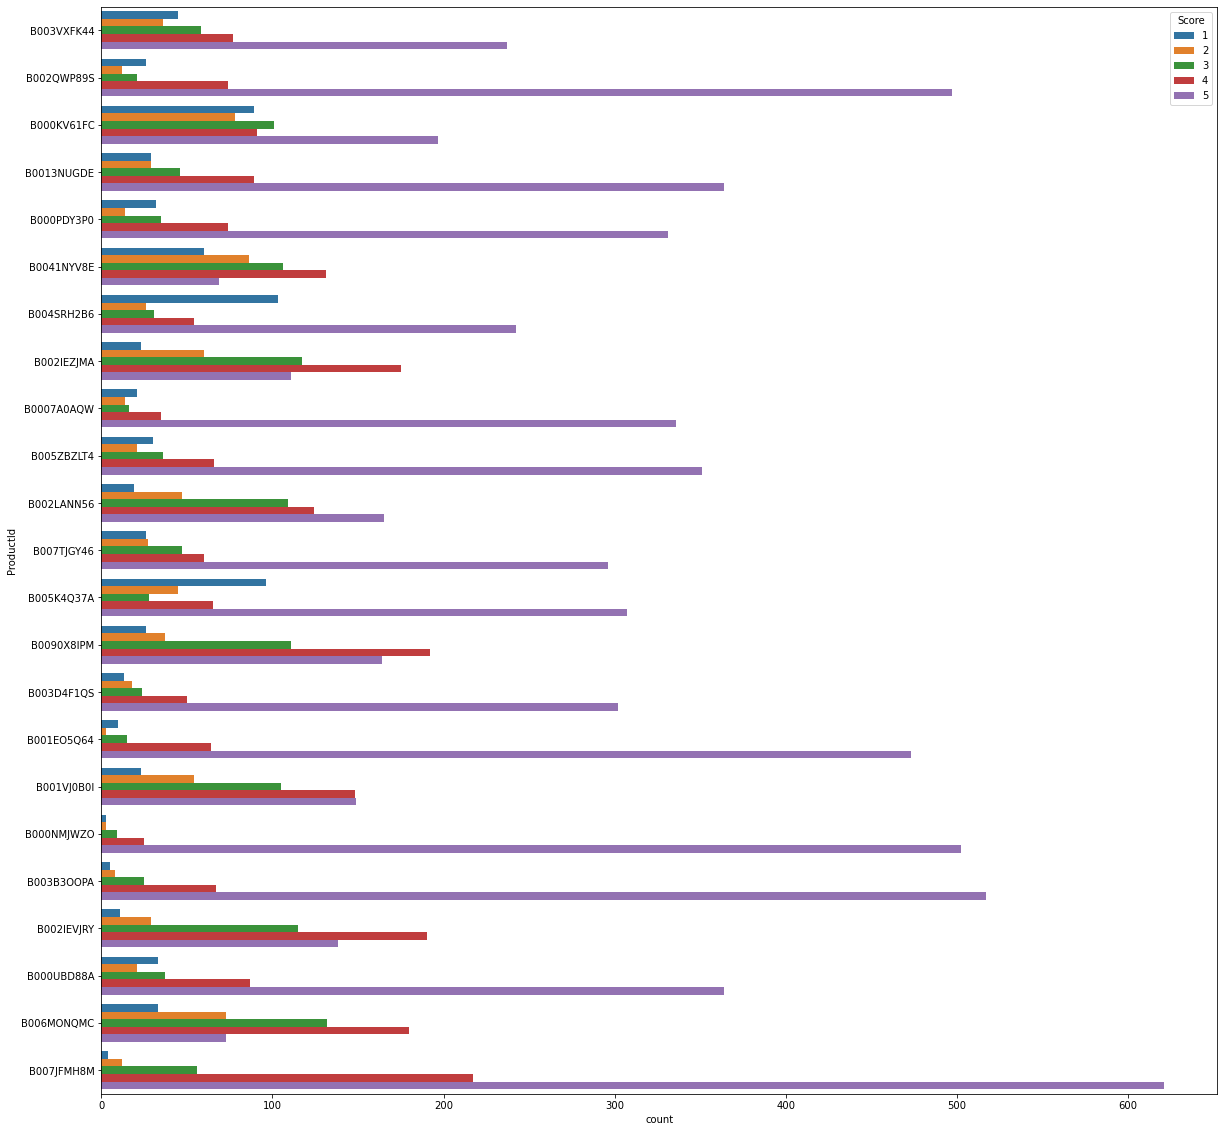

In [72]:
plt.figure(figsize=(20,20))
sns.countplot(y="ProductId",  hue="Score", data=df_products);

In [73]:
df.groupby('UserId').count()

,Id,ProductId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
UserId,,,,,,,,,
#oc-R103C0QSV1DF5E,1,1,1,1,1,1,1,1,1
#oc-R109MU5OBBZ59U,1,1,1,1,1,1,1,1,1
#oc-R10LFEMQEW6QGZ,1,1,1,1,1,1,1,1,1
#oc-R10LT57ZGIB140,1,1,1,1,1,1,1,1,1
#oc-R10UA029WVWIUI,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...
AZZV9PDNMCOZW,3,3,3,3,3,3,3,3,3
AZZVNIMTTMJH6,1,1,1,1,1,1,1,1,1
AZZY649VYAHQS,1,1,1,1,1,1,1,1,1


In [74]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 10)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

2554


In [75]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 50)
df_userGroup = df_users.groupby('UserId')
print(len(df_userGroup))

111


In [76]:
df_users = df.groupby('UserId').filter(lambda x: len(x) >= 100)
df_userGroup = df_users.groupby('UserId')
print("Number of Users:"+ str(len(df_userGroup)))
df_products = df_users.groupby('ProductId')
print("Number of products:"+ str(len(df_products)))

Number of Users:18
Number of products:2506


<AxesSubplot:xlabel='count', ylabel='UserId'>

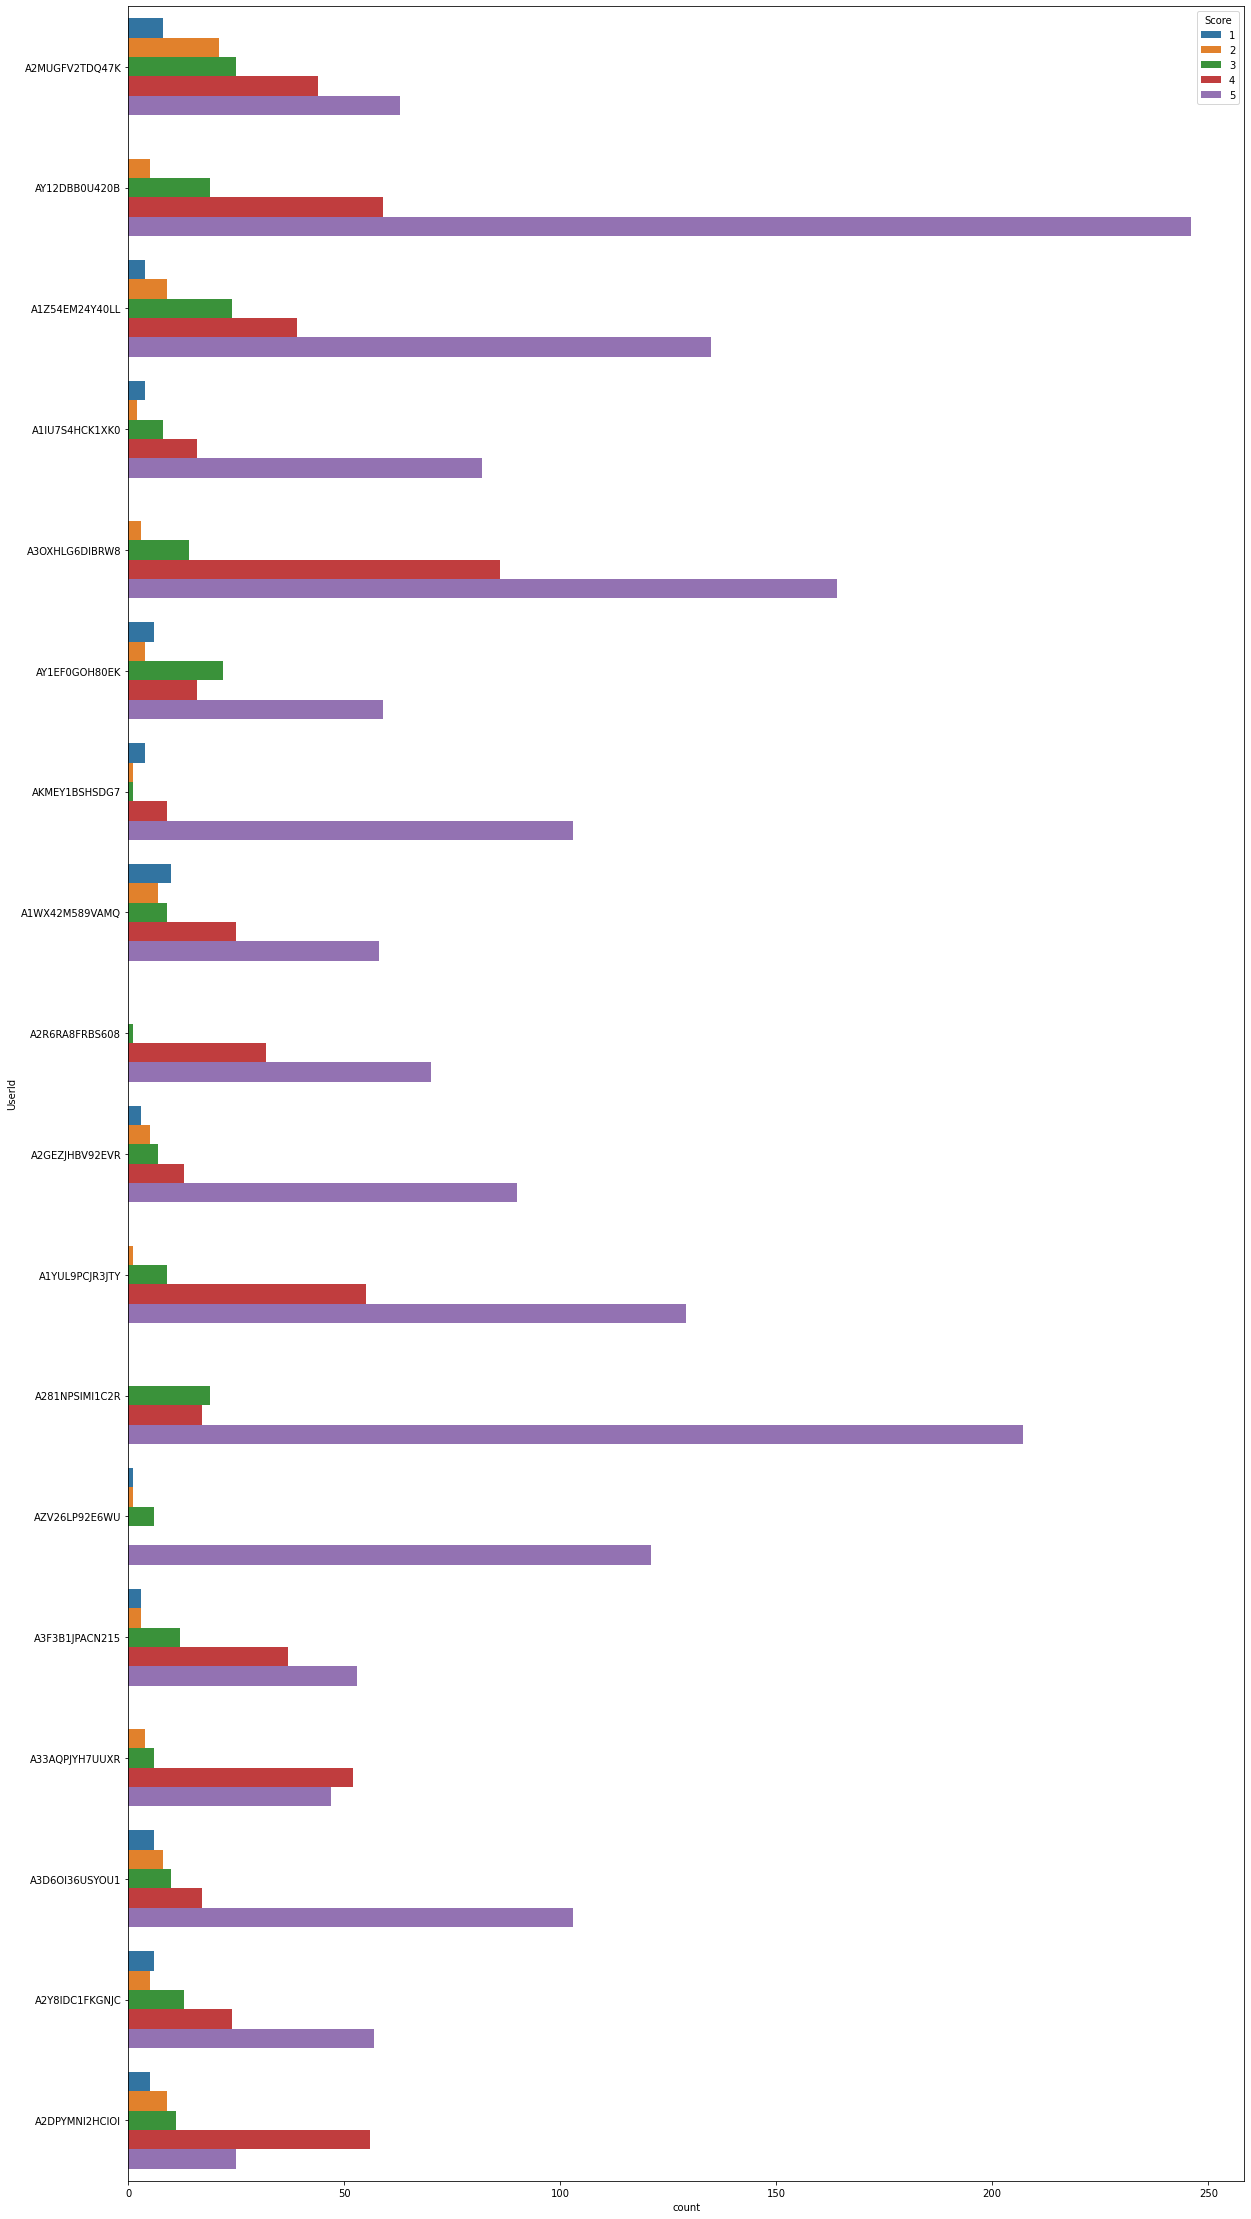

In [77]:
plt.figure(figsize=(20,40))
sns.countplot(y="UserId", hue="Score", data=df_users )

In [78]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [79]:
def remove_Stopwords(text ):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)
    

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [80]:
mask = (df["Score"] == 1) | (df["Score"] == 2)
df_rating12 = df[mask]
mask = (df["Score"]==4) | (df["Score"]==5) | (df["Score"]==3)
df_rating345 = df[mask]

In [81]:
print(len(df_rating12))
print(len(df_rating345))

57078
336574


In [82]:
df_rating12['Text'] = df_rating12['Text'].apply(clean_text)
df_rating12['Text'] = df_rating12['Text'].apply(remove_Stopwords)
df_rating12['Text'] = df_rating12['Text'].apply(lemmatize_text)


df_rating345['Text'] = df_rating345['Text'].apply(clean_text)
df_rating345['Text'] = df_rating345['Text'].apply(remove_Stopwords)
df_rating345['Text'] = df_rating345['Text'].apply(lemmatize_text)

<ipython-input-82-5b6a35e571fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating12['Text'] = df_rating12['Text'].apply(clean_text)
<ipython-input-82-5b6a35e571fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating12['Text'] = df_rating12['Text'].apply(remove_Stopwords)
<ipython-input-82-5b6a35e571fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [83]:
df_rating12['Num_words_text'] = df_rating12['Text'].apply(lambda x:len(str(x).split())) 
df_rating345['Num_words_text'] = df_rating345['Text'].apply(lambda x:len(str(x).split()))

<ipython-input-83-de89eeb66bde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating12['Num_words_text'] = df_rating12['Text'].apply(lambda x:len(str(x).split()))
<ipython-input-83-de89eeb66bde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating345['Num_words_text'] = df_rating345['Text'].apply(lambda x:len(str(x).split()))


In [84]:
df_rating12['Num_words_text'].describe()

count    57078.000000
mean        43.776166
std         42.088495
min          1.000000
25%         19.000000
50%         32.000000
75%         53.000000
max       1156.000000
Name: Num_words_text, dtype: float64

In [85]:
df_rating345['Num_words_text'].describe()

count    336574.000000
mean         40.795465
std          41.366623
min           1.000000
25%          17.000000
50%          28.000000
75%          49.000000
max        1975.000000
Name: Num_words_text, dtype: float64

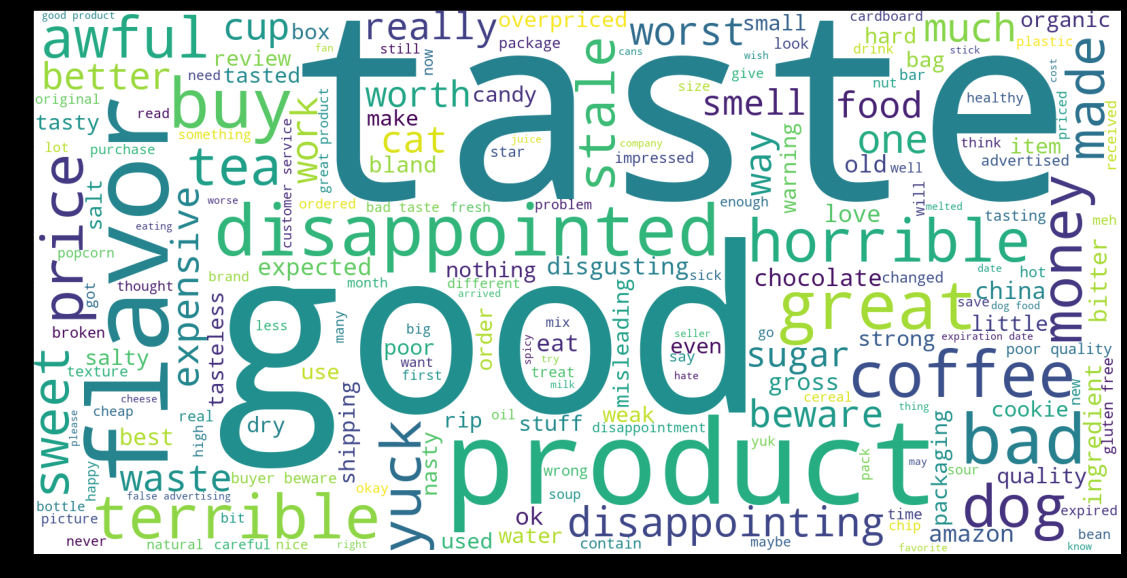

In [86]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating12['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

(-0.5, 1599.5, 799.5, -0.5)

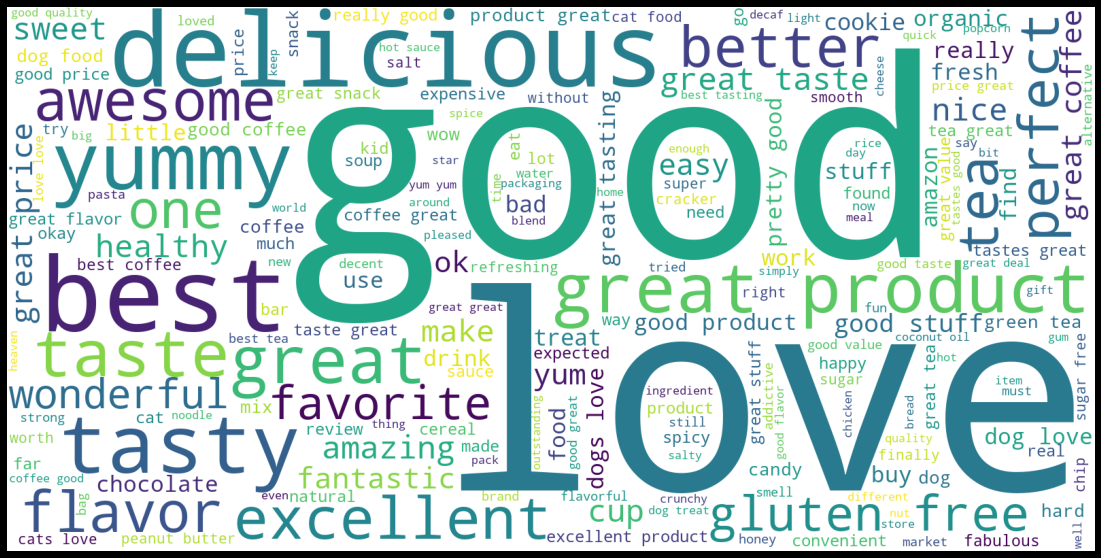

In [87]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df_rating345['Summary'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")